# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [22]:
%matplotlib inline


import pickle
import random
import numpy as np
import matplotlib
from matplotlib import pyplot
import tensorflow as tf
from pandas.io.parsers import read_csv

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

sign_names = read_csv("signnames.csv").values[:, 1]

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

def show_sample(img, y_data):
    pyplot.figure(figsize=(1,1))
    pyplot.title(sign_names[y_data], fontsize=8)
    pyplot.tick_params(axis='both', which='major', labelsize=6)
    pyplot.imshow(img)
        

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Class 0: Speed limit (20km/h)                                180 samples


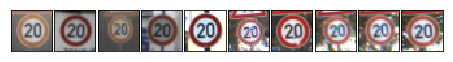

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                                1980 samples


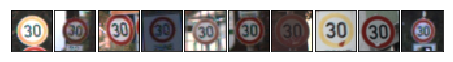

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                                2010 samples


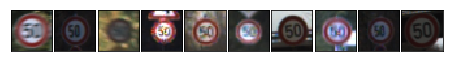

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                                1260 samples


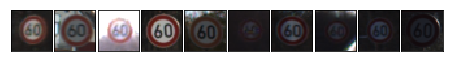

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                                1770 samples


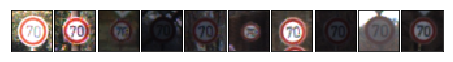

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                                1650 samples


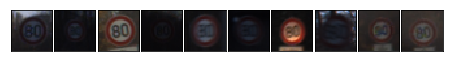

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                         360 samples


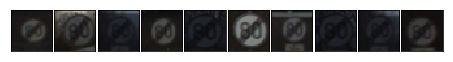

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                               1290 samples


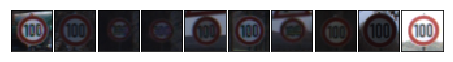

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                               1260 samples


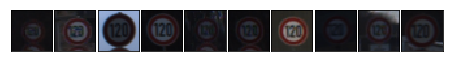

--------------------------------------------------------------------------------------

Class 9: No passing                                          1320 samples


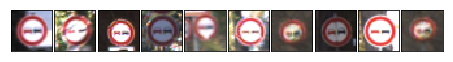

--------------------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons        1800 samples


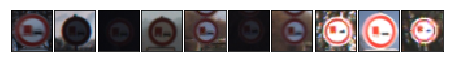

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection               1170 samples


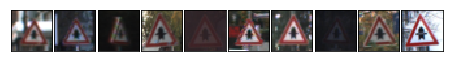

--------------------------------------------------------------------------------------

Class 12: Priority road                                       1890 samples


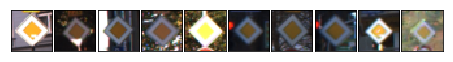

--------------------------------------------------------------------------------------

Class 13: Yield                                               1920 samples


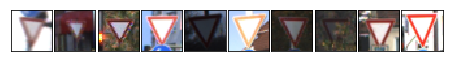

--------------------------------------------------------------------------------------

Class 14: Stop                                                690 samples


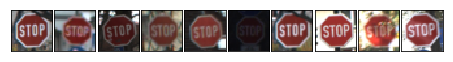

--------------------------------------------------------------------------------------

Class 15: No vehicles                                         540 samples


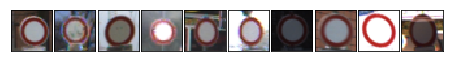

--------------------------------------------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited            360 samples


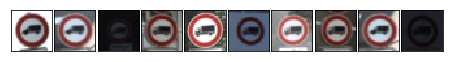

--------------------------------------------------------------------------------------

Class 17: No entry                                            990 samples


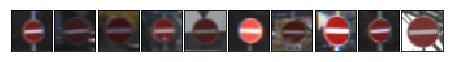

--------------------------------------------------------------------------------------

Class 18: General caution                                     1080 samples


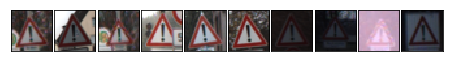

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                         180 samples


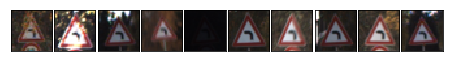

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                        300 samples


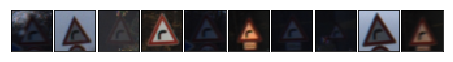

--------------------------------------------------------------------------------------

Class 21: Double curve                                        270 samples


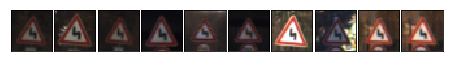

--------------------------------------------------------------------------------------

Class 22: Bumpy road                                          330 samples


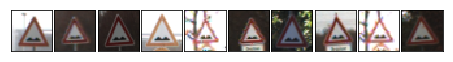

--------------------------------------------------------------------------------------

Class 23: Slippery road                                       450 samples


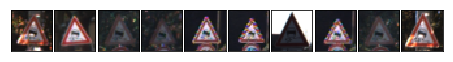

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right                           240 samples


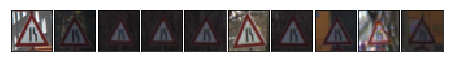

--------------------------------------------------------------------------------------

Class 25: Road work                                           1350 samples


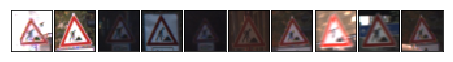

--------------------------------------------------------------------------------------

Class 26: Traffic signals                                     540 samples


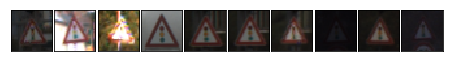

--------------------------------------------------------------------------------------

Class 27: Pedestrians                                         210 samples


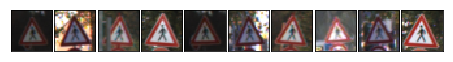

--------------------------------------------------------------------------------------

Class 28: Children crossing                                   480 samples


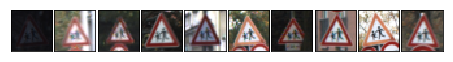

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                   240 samples


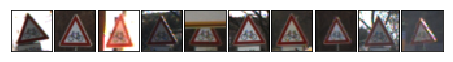

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                  390 samples


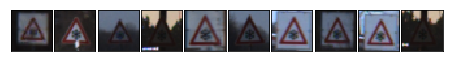

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing                               690 samples


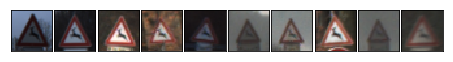

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                 210 samples


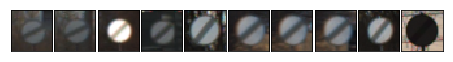

--------------------------------------------------------------------------------------

Class 33: Turn right ahead                                    599 samples


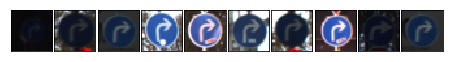

--------------------------------------------------------------------------------------

Class 34: Turn left ahead                                     360 samples


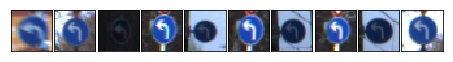

--------------------------------------------------------------------------------------

Class 35: Ahead only                                          1080 samples


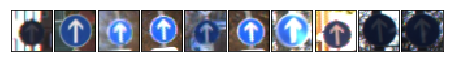

--------------------------------------------------------------------------------------

Class 36: Go straight or right                                330 samples


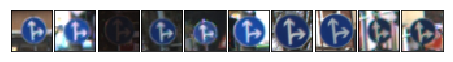

--------------------------------------------------------------------------------------

Class 37: Go straight or left                                 180 samples


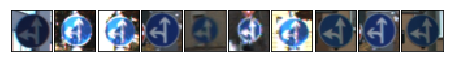

--------------------------------------------------------------------------------------

Class 38: Keep right                                          1860 samples


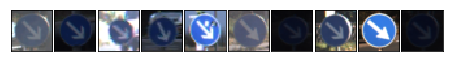

--------------------------------------------------------------------------------------

Class 39: Keep left                                           270 samples


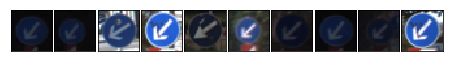

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                                300 samples


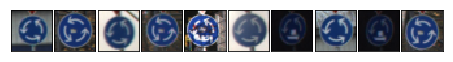

--------------------------------------------------------------------------------------

Class 41: End of no passing                                   210 samples


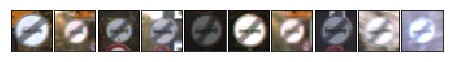

--------------------------------------------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons  210 samples


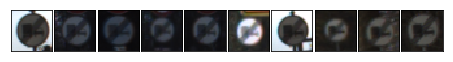

--------------------------------------------------------------------------------------



In [23]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



#Globals
IMG_SIZE = image_shape[0]  # square image of size IMG_SIZE x IMG_SIZE
GRAYSCALE = True  # convert image to grayscale?
INPUT_CHANNELS = 1 if GRAYSCALE else image_shape[2]
NUM_CLASSES = n_classes

import random

col_width = max(len(name) for name in sign_names)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, sign_names[c], str(c_count)))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print("--------------------------------------------------------------------------------------\n")
    


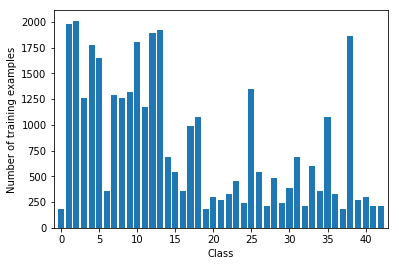

In [3]:
pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

Number of training examples = 34799
Number of testing examples = 12630


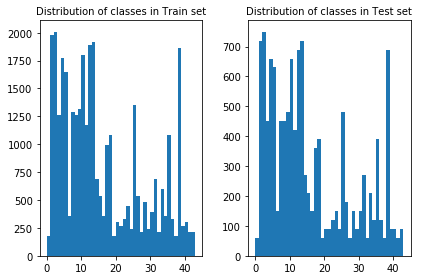

In [4]:
fig, (ax1, ax2) = pyplot.subplots(nrows=1, ncols=2)
ax1.set_title('Train', fontsize=8)

bins = range(n_classes + 1)
ax1.hist(y_train, bins=bins)
ax1.set_title('Distribution of classes in Train set', fontsize=10)

ax2.hist(y_test, bins=bins)
ax2.set_title('Distribution of classes in Test set', fontsize=10)

pyplot.tight_layout()

print("Number of training examples =", len(y_train))
print("Number of testing examples =", len(y_test))  

Number of training examples = 50879
Number of testing examples = 12630


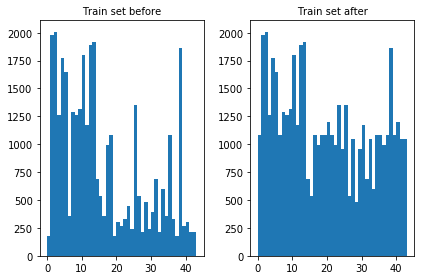

In [24]:
### Data augmentation on the fly

import cv2

DATA_AUGMENTATION = True # enable/disable

import random
random.seed(a=13)

translate_dist = 5
rotate_dist = 20 # degree

def generate_params():    
    tx = random.randint(0, 2*translate_dist) - translate_dist
    ty = random.randint(0, 2*translate_dist) - translate_dist
    angle = random.uniform(0.0, 2*rotate_dist) - rotate_dist
    return tx, ty, angle

def generate_sample(im):
    tx, ty, angle = generate_params()
    w = im.shape[0]
    h = im.shape[1]
    M = cv2.getRotationMatrix2D((w/2,h/2),angle,1)
    im = cv2.warpAffine(im,M,(w,h))   
    return im        

def get_class_samples(hist, X_data, y_data):
    
    class_dict = dict()
    class_set = set()
    
    h_min = np.min(hist)
    h_max = np.max(hist)

    target = int((h_max - h_min) / 4)

    for i in range(len(X_data)):
        cls_n = y_data[i]
        num = hist[cls_n]
        if num < target:
            item = class_dict.get(str(cls_n))
            if item is None:
                class_dict[str(cls_n)] = list()
            item = class_dict[str(cls_n)]
            item.append(X_data[i])
            class_set.add(cls_n)
            
    return class_dict, class_set

def data_augmentation(hist, X_data, y_data):
    X_gen = list()
    y_gen = list()
    
    counter_cls_dict = dict()

    h_min = np.min(hist)
    h_max = np.max(hist)

    target = int((h_max - h_min)/2)
    
    train_dict, train_cls = get_class_samples(hist, X_data, y_data)
    for cls in train_cls:
        samples = train_dict[str(cls)]
        n_samples = len(samples)
        
        count = int(target / n_samples)
        counter_cls_dict[str(cls)] = count
        
        for n in range(count):
            for im in samples:
                X_gen.append(generate_sample(im))
                y_gen.append(cls)
            
    X_gen = np.asarray(X_gen, dtype=X_train.dtype)
    y_gen = np.asarray(y_gen, dtype=y_train.dtype)
  
    counter_cls_dict['classes_set'] = train_cls
    
    return X_gen, y_gen, counter_cls_dict


# Do data augmentation
if DATA_AUGMENTATION:
    
    global X_train
    global y_train
    
    y_train_init = y_train
    
    train_hist = np.histogram(y_train, bins=range(n_classes+1))
    X_gen, y_gen, counter_cls_dict = data_augmentation(train_hist[0], X_train, y_train)
    assert (len(X_gen)==len(y_gen))
    if (len(X_gen)):
        X_train = np.append(X_train, X_gen, axis=0)
        y_train = np.append(y_train, y_gen, axis=0)
        train_hist = np.histogram(y_train, bins=range(n_classes+1))

    # Draw histograms
    fig, (ax1, ax2) = pyplot.subplots(nrows=1, ncols=2)
    ax1.set_title('Train', fontsize=8)

    bins = range(n_classes+1)
    ax1.hist(y_train_init, bins=bins)
    ax1.set_title('Train set before', fontsize=10)

    ax2.hist(y_train, bins=bins)
    ax2.set_title('Train set after', fontsize=10)

    pyplot.tight_layout()
    
n_train = len(y_train)

print("Number of training examples =", len(y_train))
print("Number of testing examples =", len(y_test))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [25]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from skimage import exposure
import warnings 

num_classes = 43

def preprocess(X, y = None):
    
    print("Preprocessing dataset with {} examples:".format(X.shape[0]))

    #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
        
    if y is not None:  
        # Convert to one-hot encoding. Convert back with `y = y.nonzero()[1]`
        y = np.eye(num_classes)[y]
        X, y = shuffle(X, y)

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X, y
    
def class_name(one_hot):
    return sign_names[one_hot.nonzero()[0][0]]


# X_train, y_train = train['features'], train['labels']
# X_valid, y_valid = valid['features'], valid['labels']
# X_test, y_test = test['features'], test['labels']

# # Example Before Preprocess
# X_original = X_train
# y_original = y_train

# original_index = random.randint(0, len(X_original))

# Preprocess
X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)

# train_index = random.randint(0, len(X_train))
# fig = pyplot.figure(figsize=(3, 1))
# axis = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
# axis.imshow(X_train[original_index].reshape(32, 32), cmap='gray')
# axis = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
# axis.imshow(X_original[original_index])
# pyplot.show()



Preprocessing dataset with 50879 examples:
Preprocessing dataset with 12630 examples:


In [26]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Size of training set =", X_train.shape)
print("Size of validation set =", X_validation.shape)

Size of training set = (40703, 32, 32, 1)
Size of validation set = (10176, 32, 32, 1)


### Model Architecture

In [27]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

BETA = 0.00001
# l2_reg = True

def LeNet(x, input_channels, keep_prob=0.5, dropout=True):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_channels, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

   
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # dropout
    if dropout:
        fc1 = tf.nn.dropout(fc1, keep_prob)
        

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # dropout
    if dropout:
        fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, NUM_CLASSES), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(NUM_CLASSES))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    # L2 regularization
    l2reg = BETA * tf.nn.l2_loss(conv1_W) + BETA * tf.nn.l2_loss(conv1_b) 
    l2reg = l2reg + BETA * tf.nn.l2_loss(conv2_W) + BETA * tf.nn.l2_loss(conv2_b)
    l2reg = l2reg + BETA * tf.nn.l2_loss(fc1_W) + BETA * tf.nn.l2_loss(fc1_b)
    l2reg = l2reg + BETA * tf.nn.l2_loss(fc2_W) + BETA * tf.nn.l2_loss(fc2_b)
    l2reg = l2reg + BETA * tf.nn.l2_loss(fc3_W) + BETA * tf.nn.l2_loss(fc3_b)
        
    return logits, l2reg

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [35]:
# Parameters
rate = 0.001


# Regularization
keep_prob  = tf.placeholder(tf.float32)
keep_prob_val = 0.5


x = tf.placeholder(tf.float32, (None, 32, 32, INPUT_CHANNELS))
y = tf.placeholder(tf.int32, (None))

# Training pipeline
logits, l2reg = LeNet(x, INPUT_CHANNELS, keep_prob, dropout=True)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)

loss_operation = tf.reduce_mean(cross_entropy + l2reg)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [36]:
### Train your model here.
### Feel free to use as many code cells as needed.

RESTORE = False
EPOCHS = 100
BATCH_SIZE = 128

with tf.Session() as sess:
    saver = tf.train.Saver()
    
    if RESTORE:
        print('Restoring previously trained model')
        # Restore previously trained model
        saver.restore(sess, './traffic_sign')
    else:
        sess.run(tf.global_variables_initializer())
    
    num_examples = len(X_train)
    
    print("learning rate             = ", rate)
    print("batch size                = ", BATCH_SIZE)
    print("total epochs              = ", EPOCHS)
    print("dropout keep probability  = ", keep_prob_val)
    print()
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_val})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
        
    saver.save(sess, './traffic_sign')
    print("Model saved")

learning rate             =  0.001
batch size                =  128
total epochs              =  100
dropout keep probability  =  0.5

Training...

EPOCH 1 ...
Validation Accuracy = 0.579
Train Accuracy = 0.581

EPOCH 2 ...
Validation Accuracy = 0.768
Train Accuracy = 0.775

EPOCH 3 ...
Validation Accuracy = 0.848
Train Accuracy = 0.857

EPOCH 4 ...
Validation Accuracy = 0.890
Train Accuracy = 0.901

EPOCH 5 ...
Validation Accuracy = 0.911
Train Accuracy = 0.918

EPOCH 6 ...
Validation Accuracy = 0.934
Train Accuracy = 0.940

EPOCH 7 ...
Validation Accuracy = 0.938
Train Accuracy = 0.947

EPOCH 8 ...
Validation Accuracy = 0.952
Train Accuracy = 0.958

EPOCH 9 ...
Validation Accuracy = 0.959
Train Accuracy = 0.965

EPOCH 10 ...
Validation Accuracy = 0.957
Train Accuracy = 0.965

EPOCH 11 ...
Validation Accuracy = 0.967
Train Accuracy = 0.971

EPOCH 12 ...
Validation Accuracy = 0.968
Train Accuracy = 0.974

EPOCH 13 ...
Validation Accuracy = 0.970
Train Accuracy = 0.977

EPOCH 14 ...
Val

In [37]:
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_sign
Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Preprocessing dataset with 5 examples:


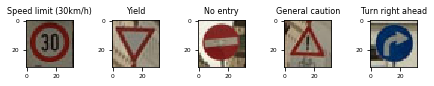

In [79]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# import scipy.ndimage
# from glob import glob

# print("New test images: ")

# X_new_test = np.array([ scipy.ndimage.imread(f) for f in glob('test-images/*') ])

# fig = pyplot.figure(figsize=(16,8))
# c = 1
# for test_image in X_new_test:
#     subplt = fig.add_subplot(6,8,c)
#     subplt.set_title("%d" % c, loc='center')
#     imgplot = pyplot.imshow(test_image)
#     c += 1

# pyplot.show()

new_images_set = [['test-images/im-01.jpg', 1],
                  ['test-images/im-13.jpg', 13],
                  ['test-images/im-17.jpg', 17],
                  ['test-images/im-18.jpg', 18],
                  ['test-images/im-33.jpg', 33],
                 ]

n_new_images = len(new_images_set)

X_test_new = np.ndarray((n_new_images, 32, 32, 3), dtype=np.uint8)
#y_test_new = np.zeros((n_new_images, n_classes), dtype=y_test.dtype)
y_test_new = np.zeros((n_new_images), dtype=y_test.dtype)

new_images = X_test_new

# load samples
for i, im, in enumerate(new_images_set):
    n_class = im[1]
    X_test_new [i] = read_image_rgb(im[0])
    y_test_new [i] = n_class

# display samples
def show_sample(ax, index):
    ax.set_title(sign_names[int(y_test_new[index])], fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.imshow(X_test_new[index])
    
fig, (ax1, ax2, ax3, ax4, ax5) = pyplot.subplots(nrows=1, ncols=5)

show_sample(ax1, 0)
show_sample(ax2, 1)
show_sample(ax3, 2)
show_sample(ax4, 3)
show_sample(ax5, 4)

pyplot.tight_layout()    

X_test_new, _ = np.array(preprocess(X_test_new))

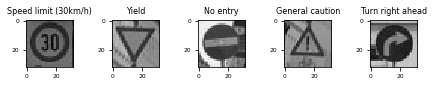

In [81]:
def show_sample(ax, index):
    ax.set_title(sign_names[int(y_test_new[index])], fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    gr = np.squeeze(X_test_new[index], axis=2)
    ax.imshow(np.dstack((gr,gr,gr)))

# Preprocessed samples
fig, (ax1, ax2, ax3, ax4, ax5) = pyplot.subplots(nrows=1, ncols=5)

show_sample(ax1, 0)
show_sample(ax2, 1)
show_sample(ax3, 2)
show_sample(ax4, 3)
show_sample(ax5, 4)

pyplot.tight_layout()

### Predict the Sign Type for Each Image

Shape of X_new_test =  (5, 32, 32, 1)
INFO:tensorflow:Restoring parameters from .\traffic_sign
Probabilities =  [[ -26.97810745   39.93963242   -1.73861909  -32.8553009     3.14423347
   -10.81831741  -30.93616676   -8.63504124  -26.99966431 -107.14810181
   -96.44671631  -40.0609436   -37.6293335   -79.59690857  -36.79364014
   -61.26309967  -68.89268494  -68.68401337  -50.35758591  -80.48221588
  -141.74778748  -55.319767   -123.69852448 -124.54482269  -97.40441132
   -60.05223846  -64.71173096  -74.56018066  -98.52854156  -70.70123291
   -94.32126617  -38.39035797  -71.54862213  -60.56851959 -103.9487381
   -78.55591583  -89.30327606  -74.61326599  -66.19799805  -80.95214844
   -42.24423981 -118.69954681  -89.81912231]
 [-195.63137817 -105.94402313  -80.47669983  -81.62339783  -38.55666351
   -93.50745392 -284.13937378 -146.73887634 -143.39630127  -11.57189178
   -81.17388153 -142.01234436   12.48456383   85.07741547   -5.19032145
    24.01029396 -167.68437195  -86.79911041 -197.399

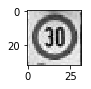

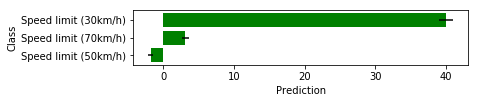

Image 2


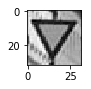

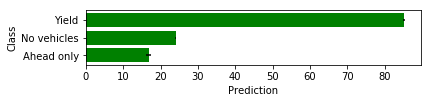

Image 3


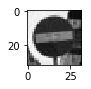

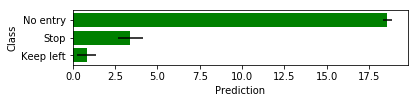

Image 4


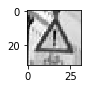

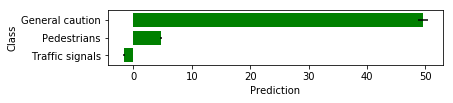

Image 5


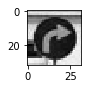

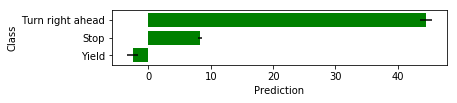

In [84]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Run the predictions here.
### Feel free to use as many code cells as needed.

print("Shape of X_new_test = ", X_test_new.shape)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    p = sess.run(logits, feed_dict={x: X_test_new, keep_prob: 1.0})

    print("Probabilities = ", p)
    top = sess.run(tf.nn.top_k(tf.constant(p), k=3))

    print(top)
    
def plot_prediction(image, prediction, class_label):
    
    pyplot.figure(figsize=(1,1))
    pyplot.imshow(image.reshape(32, 32), cmap='gray')
    
    fig, ax = pyplot.subplots(figsize = (6, 1))

    y_pos = np.arange(len(class_label))
    error = np.random.rand(len(prediction))

    ax.barh(y_pos, prediction, xerr=error, align='center', color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(sign_names[class_label])
    ax.invert_yaxis()
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Class')

    pyplot.show()

count = 1 
for image, p,c in zip(X_test_new, top[0], top[1]):
    print("Image", count)
    
    plot_prediction(image, p, c)
    count +=1

### Analyze Performance

In [63]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_new_test, keep_prob: 1.0})
    print("Test Accuracy = {:.3f}".format(accuracy))

INFO:tensorflow:Restoring parameters from .\traffic_sign


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_17' with dtype int32
	 [[Node: Placeholder_17 = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Placeholder_17/_385 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_17_Placeholder_17", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_17', defined at:
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-acd6a3123b41>", line 11, in <module>
    y = tf.placeholder(tf.int32, (None))
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\zacha\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_17' with dtype int32
	 [[Node: Placeholder_17 = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
	 [[Node: Placeholder_17/_385 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_17_Placeholder_17", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")